In [1]:
from keras import backend as K
import time
import cv2
import os
import glob
import numpy as np
from numpy import genfromtxt
import tensorflow as tf
from fr_utils import *

PADDING = 50



E:\Programs\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [60]:
from matplotlib.pyplot import imshow
import face_recognition

%matplotlib inline

def prepare_database():
    database = {}

    # load all the images of individuals to recognize into the database
    for file in glob.glob("images/*"):
        identity = os.path.splitext(os.path.basename(file))[0]
        
        img = cv2.imread(file)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img=resize(img)
        '''
        if 'ezz_rot' in identity:
            img= allignFace(img)
            print('ezz_rot')
        ''' 

        database[identity] = face_recognizer(img)
        print(identity)
        #imshow(img)

        
    return database


        
def face_recognizer(frame):
    """
    Runs a loop that extracts images from the computer's webcam and determines whether or not
    it contains the face of a person in our database.

    If it contains a face, an audio message will be played welcoming the user.
    If not, the program will process the next frame from the webcam
    """

    #frame= allignFace(frame)

    boxes = face_recognition.face_locations(frame,model='cnn')
    if boxes ==[]:
        boxes=[(0,frame.shape[0],frame.shape[1],0)]
        #print('empty')    
    #print(boxes)
    encoding = face_recognition.face_encodings(frame, boxes)      

    return encoding  


#database = prepare_database()


In [58]:
def match_face(identity_match,encoding, database):
    """
    Implements face recognition for the happy house by finding who is the person on the image_path image.
    
    Arguments:
    image_path -- path to an image
    database -- database containing image encodings along with the name of the person on the image
    model -- your Inception model instance in Keras
    
    Returns:
    min_dist -- the minimum distance between image_path encoding and the encodings from the database
    identity -- string, the name prediction for the person on image_path
    """
    
    min_dist = 100

    
    # Loop over the database dictionary's names and encodings.
    for (name, db_enc) in database.items():
        #results = face_recognition.compare_faces([db_enc], encoding)
        # Compute L2 distance between the target "encoding" and the current "emb" from the database.
        #print('db_enc',db_enc)
        #print('encoding',encoding)
        
        dist = np.linalg.norm(db_enc[0] - encoding[0])
        
        print('%s  %s  %s' %(identity_match,name,1.0/dist))

        #print('distance for %s is %s: %s' %(name,1.0/dist, dist))

        # If this distance is less than the min_dist, then set min_dist to dist, and identity to name
        if dist < min_dist:
            min_dist = dist
            identity = name
    
    if min_dist > 0.52:
        return None
    else:
        return str(identity)

def welcome_users(identities):
    """ Outputs a welcome audio message to the users """
    welcome_message = 'Welcome '

    if len(identities) == 1:
        welcome_message += '%s, have a nice day.' % identities[0]
    else:
        for identity_id in range(len(identities)-1):
            welcome_message += '%s, ' % identities[identity_id]
        welcome_message += 'and %s, ' % identities[-1]
        welcome_message += 'have a nice day!'


In [28]:
for (name, db_enc) in database.items():
    print(name,len(db_enc[0]))


Moh_Osama 128
ezz1 128
wady 128
heba 128
osama 128
Amira 128
rahma 128
mo3az 128
ahmed_s 128
Ahmed_b 128
eman 128
Mohamed 128
ezz_rot 128
hamada 128
ezz2 128
ezz_norm 128
3abeer 128


In [29]:
def resize(img):
    height, width = img.shape[:2] # without channel
    #print(height, width)
    area= height* width
    #print(area)
    scale = 100000.0/area
    dim=(int(width*scale),int(height*scale)) 
    #print(dim)
    resized = cv2.resize(img, dim, interpolation =cv2.INTER_AREA)
    imshow(resized) 
    return resized

3abeer
Ahmed_b
ahmed_s
Amira
eman
ezz1
ezz2
ezz_norm
ezz_rot
hamada
heba
mo3az
Mohamed
Moh_Osama
osama
rahma
wady
ahmed_s  Moh_Osama  1.844921275968946
ahmed_s  ezz1  1.2751555867332747
ahmed_s  wady  1.1941193869155307
ahmed_s  heba  1.4258612196809755
ahmed_s  osama  1.2670904300802515
ahmed_s  Amira  1.2644744452355898
ahmed_s  rahma  1.3195516786170256
ahmed_s  mo3az  1.750973858410947
ahmed_s  ahmed_s  inf
ahmed_s  Ahmed_b  1.2626274442892245
ahmed_s  eman  1.322867328207845
ahmed_s  Mohamed  1.4483795516366957
ahmed_s  ezz_rot  1.329135072611617
ahmed_s  hamada  1.4085924805965717
ahmed_s  ezz2  1.3184183296931813
ahmed_s  ezz_norm  1.3556039215856257
ahmed_s  3abeer  1.3624542600140666


E:\Programs\Anaconda\lib\site-packages\ipykernel\__main__.py:27: RuntimeWarning: divide by zero encountered in double_scalars


Amira  Moh_Osama  1.3652539831381378
Amira  ezz1  1.181109073181465
Amira  wady  1.192084620490808
Amira  heba  1.7002012241443003
Amira  osama  1.4245146793893217
Amira  Amira  inf
Amira  rahma  1.6212043805414176
Amira  mo3az  1.4733818314104778
Amira  ahmed_s  1.2644744452355898
Amira  Ahmed_b  1.2445578031047149
Amira  eman  1.332794776752615
Amira  Mohamed  1.2066290406189104
Amira  ezz_rot  1.20699175075098
Amira  hamada  1.2414376108716128
Amira  ezz2  1.268610519483279
Amira  ezz_norm  1.1641894263389818
Amira  3abeer  1.6380867291649315
eman  Moh_Osama  1.3762875780230541
eman  ezz1  1.188752014660628
eman  wady  1.270657239203913
eman  heba  1.2897849933849914
eman  osama  1.2987973257140202
eman  Amira  1.332794776752615
eman  rahma  1.363784756829049
eman  mo3az  1.3749981818632224
eman  ahmed_s  1.322867328207845
eman  Ahmed_b  1.289351803139496
eman  eman  inf
eman  Mohamed  1.3989505438295597
eman  ezz_rot  1.155763960711941
eman  hamada  1.4962088304900638
eman  ezz2  1

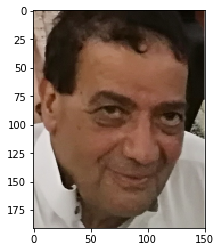

In [61]:
database = prepare_database()

#load image
for file in glob.glob("match/*"):
    identity = os.path.splitext(os.path.basename(file))[0]
            
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img=resize(img)
    '''
       if 'ezz_rot' in identity:
        img= allignFace(img)
        print('ezz_rot')
    '''

    #database[identity] = face_recognizer(img)
 
    #print(' ',identity,'Head')#,img.shape)
    encoding= face_recognizer(img)
    #print('encod',encoding.shape)

    identity= match_face(identity,encoding,database)

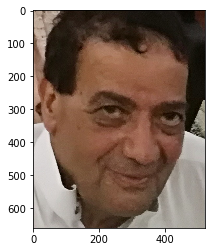

In [17]:
imshow(img)

In [21]:
img.shape[:2]


(660, 522)

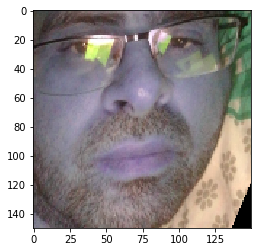

In [55]:
import sys
import dlib
import cv2
import openface

# You can download the required pre-trained face detection model here:
# http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
predictor_model = "shape_predictor_68_face_landmarks.dat"

# Take the image file name from the command line

# Create a HOG face detector using the built-in dlib class
face_detector = dlib.get_frontal_face_detector()
face_pose_predictor = dlib.shape_predictor(predictor_model)
face_aligner = openface.AlignDlib(predictor_model)

def allignFace(image):


    # Run the HOG face detector on the image data
    detected_faces = face_detector(image, 1)

    #print("Found {} faces ".format(len(detected_faces)))

    # Loop through each face we found in the image
    for i, face_rect in enumerate(detected_faces):

        # Detected faces are returned as an object with the coordinates 
        # of the top, left, right and bottom edges
        #print("- Face #{} found at Left: {} Top: {} Right: {} Bottom: {}".format(i, face_rect.left(), face_rect.top(), face_rect.right(), face_rect.bottom()))

        # Get the the face's pose
        pose_landmarks = face_pose_predictor(image, face_rect)

        # Use openface to calculate and perform the face alignment
        alignedFace = face_aligner.align(150, image, face_rect, landmarkIndices=openface.AlignDlib.OUTER_EYES_AND_NOSE)
        return alignedFace
        # Save the aligned image to a file

img = cv2.imread("match/ezz_rot.jpg")
        
alignedFace= allignFace(img)
imshow(alignedFace)

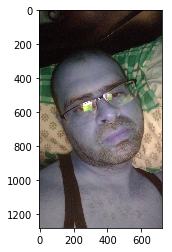

In [32]:
imshow(img)

In [18]:
import sys
import dlib
from skimage import io
def landmarkFace(image):
    # You can download the required pre-trained face detection model here:
    # http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
    predictor_model = "shape_predictor_68_face_landmarks.dat"

    # Create a HOG face detector using the built-in dlib class
    face_detector = dlib.get_frontal_face_detector()
    face_pose_predictor = dlib.shape_predictor(predictor_model)

    win = dlib.image_window()

    # Run the HOG face detector on the image data
    detected_faces = face_detector(image, 1)

    print("Found {} faces ".format(len(detected_faces)))

    # Show the desktop window with the image
    win.set_image(image)

    # Loop through each face we found in the image
    for i, face_rect in enumerate(detected_faces):

        # Detected faces are returned as an object with the coordinates 
        # of the top, left, right and bottom edges
        print("- Face #{} found at Left: {} Top: {} Right: {} Bottom: {}".format(i, face_rect.left(), face_rect.top(), face_rect.right(), face_rect.bottom()))

        # Draw a box around each face we found
        win.add_overlay(face_rect)

        # Get the the face's pose
        pose_landmarks = face_pose_predictor(image, face_rect)

        # Draw the face landmarks on the screen.
        win.add_overlay(pose_landmarks)
        return pose_landmarks
pos=landmarkFace(img)


Found 1 faces 
- Face #0 found at Left: 24 Top: 39 Right: 153 Bottom: 168


In [20]:
imshow(img)


In [25]:
pos